# Linear Discriminant Analysis (LDA)

**Linear Discriminant Analysis (LDA)** is a supervised dimensionality reduction technique used to project high-dimensional data onto a lower-dimensional space that best separates multiple classes. *PCA with class information!*

## Goal

LDA finds a linear projection that maximizes class separability by:

- Maximizing the between-class variance
- Minimizing the within-class variance

This leads to better class discrimination in the projected space.

## Mathematical Formulation

Given:
- A dataset $ \mathcal{D} = \{ \mathbf{x}_i, y_i \}_{i=1}^p $, where $ \mathbf{x}_i \in \mathbb{R}^d $, and $ y_i $ is a class label
- $ C $: number of classes

Define:
- **Within-class scatter matrix**:  
  $ S_W = \sum_{c=1}^C \sum_{\mathbf{x}_i \in c} (\mathbf{x}_i - \mu_c)(\mathbf{x}_i - \mu_c)^T $

- **Between-class scatter matrix**:  
  $ S_B = \sum_{c=1}^C n_c (\mu_c - \mu)(\mu_c - \mu)^T $

Where:
- $ \mu_c $: mean of class $ c $
- $ \mu $: mean of all data
- $ n_c $: number of samples in class $ c $

LDA solves the following optimization problem:

$$
\mathbf{W} = \arg\max_{\mathbf{W}} \frac{|\mathbf{W}^T S_B \mathbf{W}|}{|\mathbf{W}^T S_W \mathbf{W}|}
$$

LDA reduces to solving a generalized eigenvalue problem.

## Output

- $ \mathbf{W} \in \mathbb{R}^{d \times k} $: projection matrix
- $ k \leq C - 1 $: maximum number of discriminative components

Projected data:

$$
\mathbf{z}_i = \mathbf{W}^T \mathbf{x}_i
$$

## When to Use LDA

- You have labeled data
- You want low-dimensional features that separate classes well
- You want a fast, interpretable linear projection

**Assumptions**
- Multivariate normality: distribution over $X \times Y$ is normal
- Homoscedasticity: at each value of x, the y-value of the dots has about the same variance.
- Independent sampling

## LDA vs PCA

|               | PCA                        | LDA                            |
|---------------|----------------------------|---------------------------------|
| Supervised?   | No                         | Yes                             |
| Objective     | Maximize variance          | Maximize class separation       |
| Axes chosen   | Directions of max variance | Directions of best separation   |
| Max dimensions| ≤ input dimension          | ≤ number of classes − 1         |


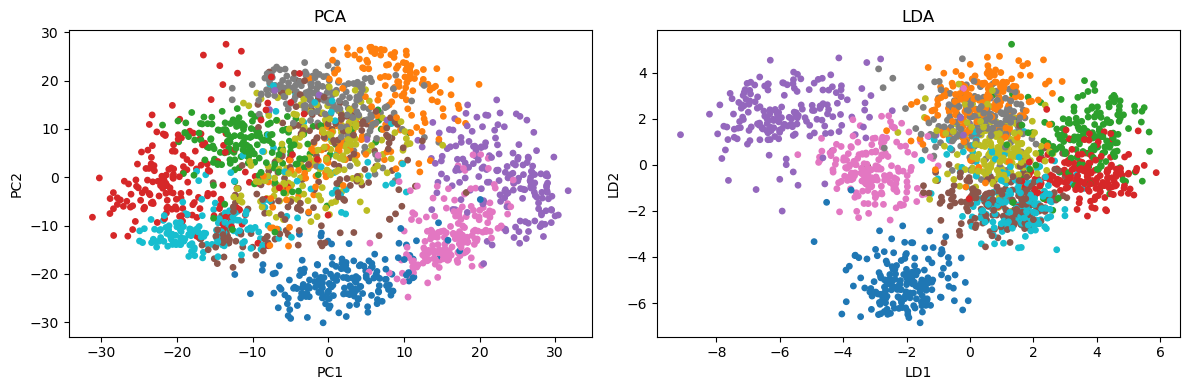

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

# Load digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# Fit LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)


# Plot in 2D
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=15)
ax2.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='tab10', s=15)
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_title("PCA")
ax2.set_xlabel("LD1")
ax2.set_ylabel("LD2")
ax2.set_title("LDA")
plt.tight_layout()
plt.show()